# Data Analysis of Features

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Return datapoints

For return datapoints we consider the following features: 
- name
- function comment (this is func_descr if present, otherwise docstring)
- return comment
- return expressions
- parameter names

In [2]:
df = pd.read_csv("../output/ml_inputs/_ml_return.csv")

In [3]:
df

,name,docstring,func_descr,return_type,return_descr,arg_names_len,arg_types_len,return_type_t,return_type_enc,arg_names_str,return_expr_str
0,bool,check whether vector non zero. assert vector a...,check whether vector non zero,bool,NaN,1,1,bool,869,NaN,NaN
1,length,compute length vector. vector length .,compute length vector,float,NaN,1,1,float,896,NaN,hypot x y
2,asdict,convert vector vector like dictionary. v vecto...,convert vector vector like dictionary,"typing.Mapping[str, float]",NaN,1,1,other,929,NaN,x x y y
3,add,add two vectors. param py class vector vector ...,add two vector,"""""""Vector""""""",NaN,2,2,"""""""Vector""""""",47,other,not implement vector x other x y other y
4,sub,subtract one vector another. param py class ve...,subtract one vector another,"""""""Vector""""""",NaN,2,2,"""""""Vector""""""",47,other,not implement vector x other x y other y
...,...,...,...,...,...,...,...,...,...,...,...
136389,unescape token,replace escaped character token unescaped vers...,replace escaped character token unescaped version,str,NaN,1,1,str,948,token,unescape regex sub match token
136390,write file,write line file use writer,write line file use writer,int,NaN,3,3,int,899,writer filename newline,l
136391,merge umcorpus,merge train file u mcorpus one file,merge train file u mcorpus one file,int,NaN,2,2,int,899,raw dir output file,line
136392,encode and save,encode data one file tf record format save mul...,encode data one file tf record format save mul...,List[str],NaN,7,7,List[str],443,tokenizer source input target input output dir...,output path output path


## Analysis of name
NOTE: the result of this must also be the length of name in the param datapoints

In [4]:
df['name_length'] = df['name'].dropna().apply(lambda x: x.split()).apply(len)
total = len(df['name'].dropna())
column = df['name_length']
column.describe()

count    136380.000000
mean          2.275752
std           1.097151
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          12.000000
Name: name_length, dtype: float64

In [5]:
coverage_per_length = pd.DataFrame(
    [[i, len(df[column <= i]) / total] for i in np.unique(column.dropna())],
    columns=['length', 'coverage']
)
coverage_per_length

,length,coverage
0,1.0,0.256020
1,2.0,0.645293
2,3.0,0.875143
3,4.0,0.960742
4,5.0,0.989977
5,6.0,0.997690
6,7.0,0.999523
7,8.0,0.999919
8,9.0,0.999963
9,10.0,0.999985


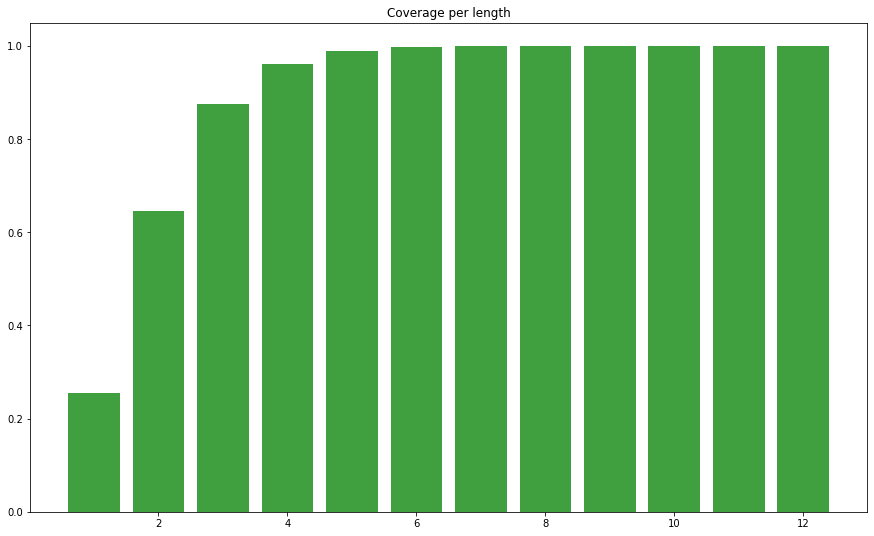

In [6]:
fig = plt.figure(figsize=(15, 9))
plt.title("Coverage per length")
plt.bar(coverage_per_length['length'], coverage_per_length['coverage'], facecolor='g', alpha=0.75)
plt.show()

In [7]:
select = 6

print(f'We select length {select}, which covers the following percentage:')

len(df[column <= select]) / total

We select length 6, which covers the following percentage:


0.99769027716674

## Analysis of function comment
NOTE: the result of this must also be the length for the parameter comment in the parameter datapoints

In [8]:
df['function_comment'] = df.apply(lambda row: row.func_descr if isinstance(row.func_descr, str) else row.docstring, axis=1)
df['function_comment_length'] = df['function_comment'].dropna().apply(lambda x: x.split()).apply(len)
total = len(df['function_comment'].dropna())
column = df['function_comment_length']
column.describe()

count    136394.000000
mean          6.313438
std          11.516074
min           1.000000
25%           4.000000
50%           5.000000
75%           7.000000
max         482.000000
Name: function_comment_length, dtype: float64

In [9]:
coverage_per_length = pd.DataFrame(
    [[i, len(df[column <= i]) / total] for i in np.unique(column.dropna())],
    columns=['length', 'coverage']
)
coverage_per_length

,length,coverage
0,1,0.009238
1,2,0.050039
2,3,0.230677
3,4,0.417284
4,5,0.593934
...,...,...
198,348,0.999971
199,351,0.999978
200,383,0.999985
201,401,0.999993


In [10]:
coverage_per_length[:20]

,length,coverage
0,1,0.009238
1,2,0.050039
2,3,0.230677
3,4,0.417284
4,5,0.593934
5,6,0.739541
6,7,0.847508
7,8,0.912775
8,9,0.947454
9,10,0.964390


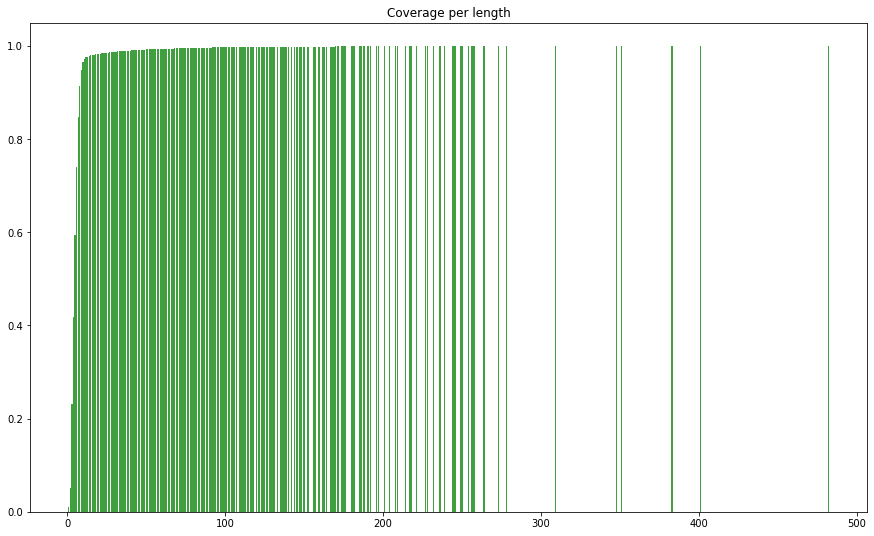

In [11]:
fig = plt.figure(figsize=(15, 9))
plt.title("Coverage per length")
plt.bar(coverage_per_length['length'], coverage_per_length['coverage'], facecolor='g', alpha=0.75)
plt.show()

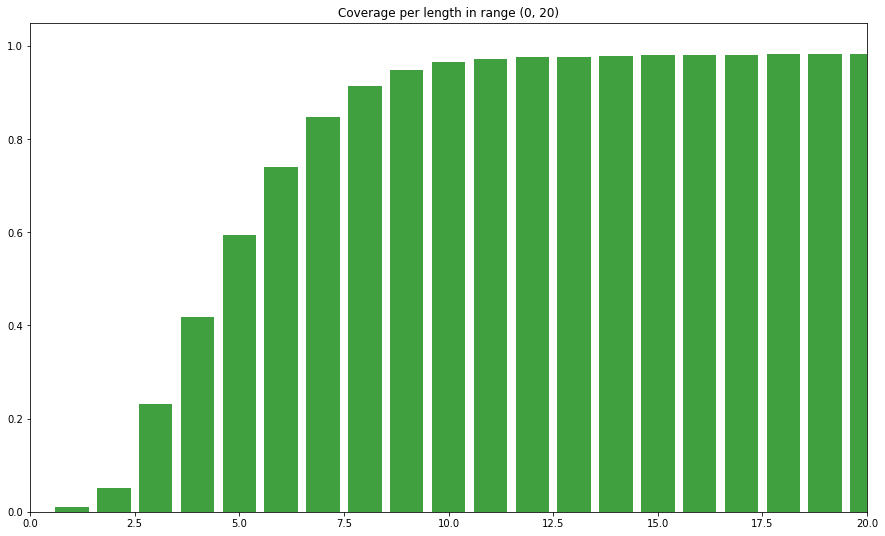

In [12]:
fig = plt.figure(figsize=(15, 9))
plt.title("Coverage per length in range (0, 20)")
plt.bar(coverage_per_length['length'], coverage_per_length['coverage'], facecolor='g', alpha=0.75)
plt.xlim([0,20])
plt.show()

In [13]:
select = 15

print(f'We select length {select}, which covers the following percentage:')

len(df[column <= select]) / total

We select length 15, which covers the following percentage:


0.9797351789668167

## Analysis of return comment

In [14]:
df['return_descr_length'] = df['return_descr'].dropna().apply(lambda x: x.split()).apply(len)
total = len(df['return_descr'].dropna())
column = df['return_descr_length']
column.describe()

count    21823.000000
mean         8.402603
std         13.643440
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max        533.000000
Name: return_descr_length, dtype: float64

In [15]:
coverage_per_length = pd.DataFrame(
    [[i, len(df[column <= i]) / total] for i in np.unique(column.dropna())],
    columns=['length', 'coverage']
)
coverage_per_length

,length,coverage
0,1.0,0.046465
1,2.0,0.190533
2,3.0,0.352976
3,4.0,0.477799
4,5.0,0.583559
...,...,...
100,352.0,0.999817
101,360.0,0.999863
102,375.0,0.999908
103,387.0,0.999954


In [16]:
coverage_per_length[:20]

,length,coverage
0,1.0,0.046465
1,2.0,0.190533
2,3.0,0.352976
3,4.0,0.477799
4,5.0,0.583559
5,6.0,0.659763
6,7.0,0.717042
7,8.0,0.755442
8,9.0,0.793337
9,10.0,0.818540


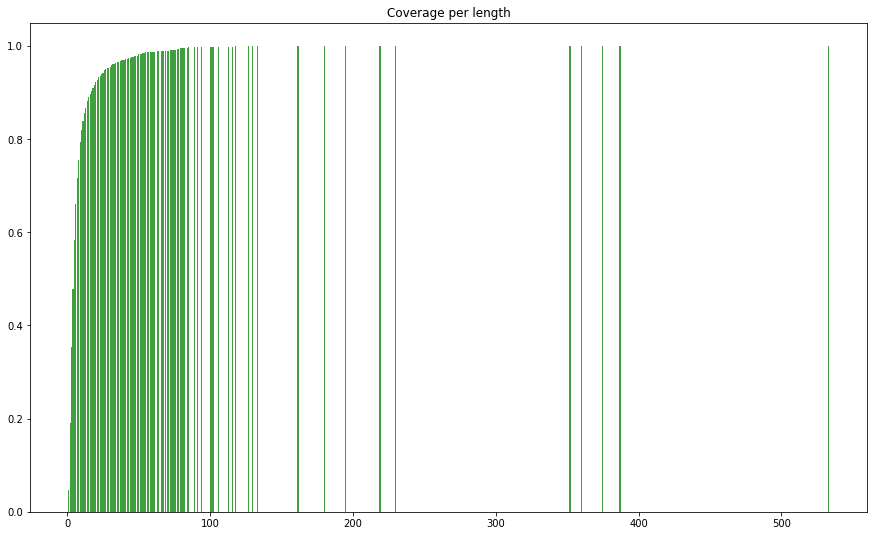

In [17]:
fig = plt.figure(figsize=(15, 9))
plt.title("Coverage per length")
plt.bar(coverage_per_length['length'], coverage_per_length['coverage'], facecolor='g', alpha=0.75)
plt.show()

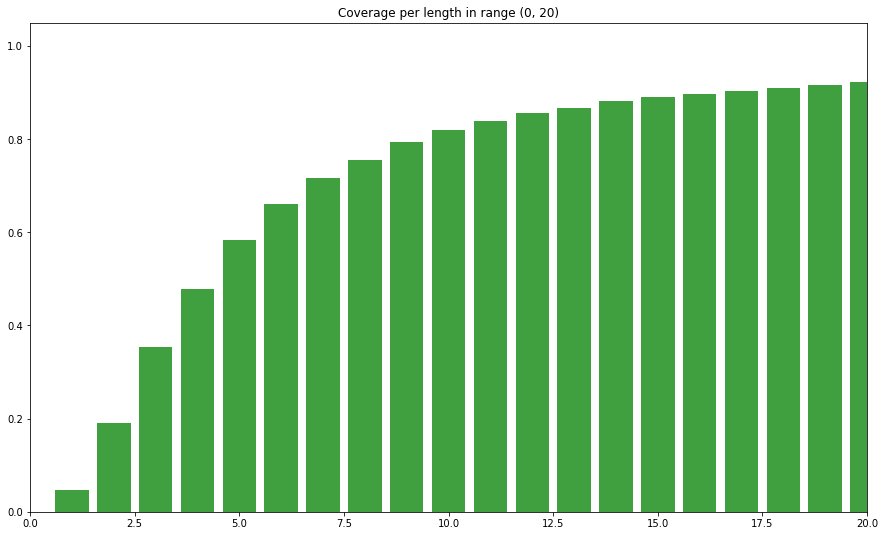

In [18]:
fig = plt.figure(figsize=(15, 9))
plt.title("Coverage per length in range (0, 20)")
plt.bar(coverage_per_length['length'], coverage_per_length['coverage'], facecolor='g', alpha=0.75)
plt.xlim([0,20])
plt.show()

In [19]:
select = 6

print(f'We select length {select}, which covers the following percentage:')

len(df[column <= select]) / total

We select length 6, which covers the following percentage:


0.6597626357512716

# Analysis of return expressions

In [20]:
df['return_expr_str_length'] = df['return_expr_str'].dropna().apply(lambda x: x.split()).apply(len)
total = len(df['return_expr_str'].dropna())
column = df['return_expr_str_length']
column.describe()

count    135322.000000
mean          6.005919
std          10.074216
min           0.000000
25%           2.000000
50%           3.000000
75%           7.000000
max        1810.000000
Name: return_expr_str_length, dtype: float64

In [21]:
coverage_per_length = pd.DataFrame(
    [[i, len(df[column <= i]) / total] for i in np.unique(column.dropna())],
    columns=['length', 'coverage']
)
coverage_per_length

,length,coverage
0,0.0,0.002705
1,1.0,0.224206
2,2.0,0.395109
3,3.0,0.505934
4,4.0,0.587805
...,...,...
153,328.0,0.999970
154,336.0,0.999978
155,352.0,0.999985
156,495.0,0.999993


In [22]:
coverage_per_length[:20]

,length,coverage
0,0.0,0.002705
1,1.0,0.224206
2,2.0,0.395109
3,3.0,0.505934
4,4.0,0.587805
5,5.0,0.651801
6,6.0,0.710572
7,7.0,0.759130
8,8.0,0.800853
9,9.0,0.832865


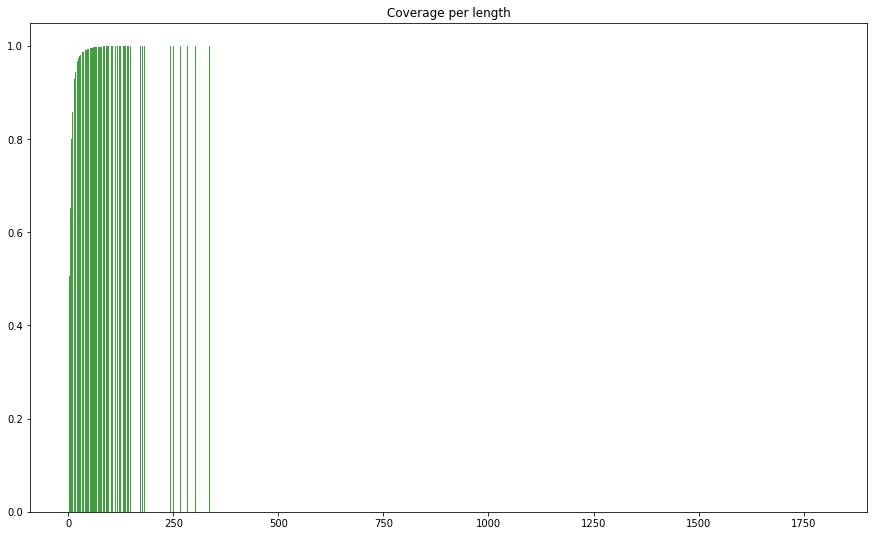

In [23]:
fig = plt.figure(figsize=(15, 9))
plt.title("Coverage per length")
plt.bar(coverage_per_length['length'], coverage_per_length['coverage'], facecolor='g', alpha=0.75)
plt.show()

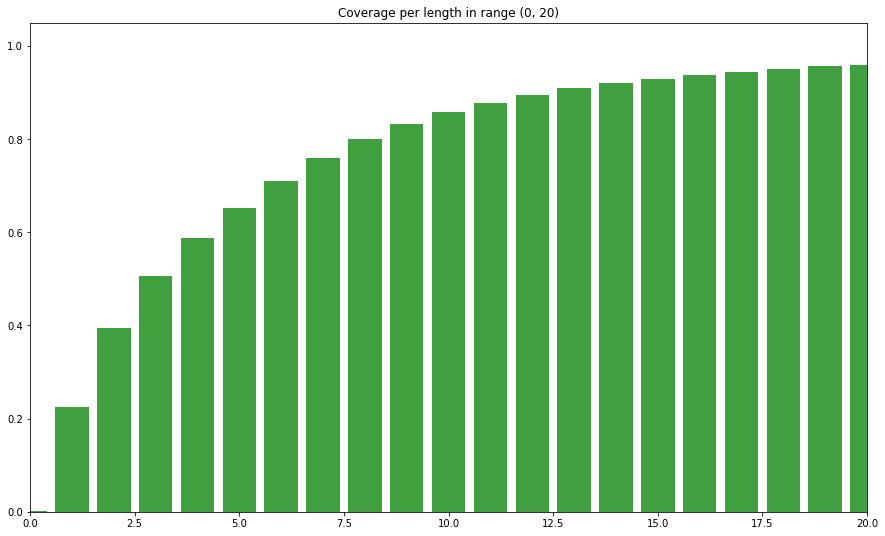

In [24]:
fig = plt.figure(figsize=(15, 9))
plt.title("Coverage per length in range (0, 20)")
plt.bar(coverage_per_length['length'], coverage_per_length['coverage'], facecolor='g', alpha=0.75)
plt.xlim([0,20])
plt.show()

In [25]:
select = 12

print(f'We select length {select}, which covers the following percentage:')

len(df[column <= select]) / total

We select length 12, which covers the following percentage:


0.8951833404767887

# Analysis of parameter names

In [26]:
df['arg_names_str_length'] = df['arg_names_str'].dropna().apply(lambda x: x.split()).apply(len)
total = len(df['arg_names_str'].dropna())
column = df['arg_names_str_length']
column.describe()

count    86402.000000
mean         2.836196
std          2.921980
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         72.000000
Name: arg_names_str_length, dtype: float64

In [27]:
coverage_per_length = pd.DataFrame(
    [[i, len(df[column <= i]) / total] for i in np.unique(column.dropna())],
    columns=['length', 'coverage']
)
coverage_per_length

,length,coverage
0,1.0,0.365304
1,2.0,0.632439
2,3.0,0.764832
3,4.0,0.841879
4,5.0,0.888220
5,6.0,0.925685
6,7.0,0.948682
7,8.0,0.962223
8,9.0,0.970834
9,10.0,0.976679


In [28]:
coverage_per_length[:20]

,length,coverage
0,1.0,0.365304
1,2.0,0.632439
2,3.0,0.764832
3,4.0,0.841879
4,5.0,0.888220
5,6.0,0.925685
6,7.0,0.948682
7,8.0,0.962223
8,9.0,0.970834
9,10.0,0.976679


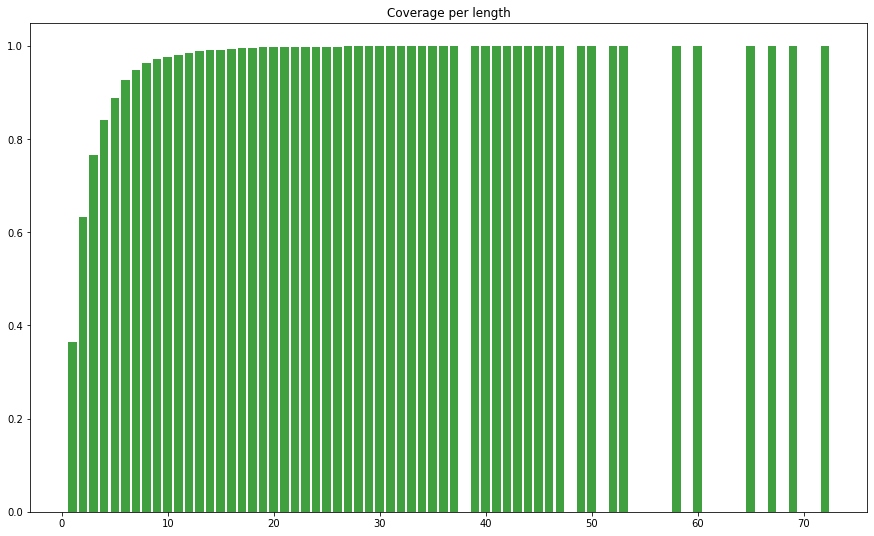

In [29]:
fig = plt.figure(figsize=(15, 9))
plt.title("Coverage per length")
plt.bar(coverage_per_length['length'], coverage_per_length['coverage'], facecolor='g', alpha=0.75)
plt.show()

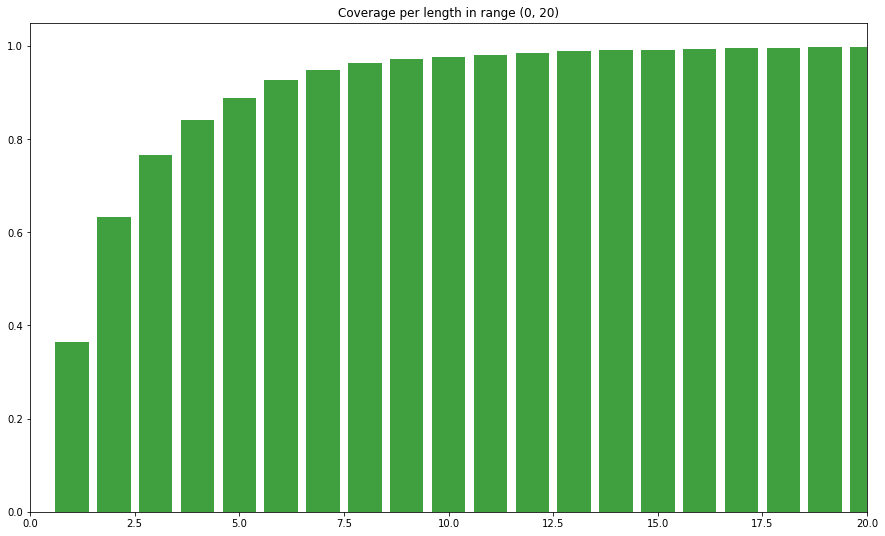

In [30]:
fig = plt.figure(figsize=(15, 9))
plt.title("Coverage per length in range (0, 20)")
plt.bar(coverage_per_length['length'], coverage_per_length['coverage'], facecolor='g', alpha=0.75)
plt.xlim([0,20])
plt.show()

In [31]:
select = 10

print(f'We select length {select}, which covers the following percentage:')

len(df[column <= select]) / total

We select length 10, which covers the following percentage:


0.9766787805837828

# Parameter datapoints

For return datapoints we consider the following features: 
- name
- comment

In [32]:
df = pd.read_csv("../output/ml_inputs/_ml_param.csv")

In [33]:
df

,Unnamed: 0,func_name,arg_name,arg_type,arg_comment,arg_type_t,arg_type_enc
0,0,add,other,VectorLike,py class vector vector like. description vecto...,other,929
1,1,sub,other,VectorLike,py class vector vector like. description vecto...,other,929
2,2,dot,other,VectorLike,py class vector vector like. description vecto...,other,929
3,3,scale by,scalar,typing.SupportsFloat,NaN,other,929
4,4,truediv,other,typing.SupportsFloat,NaN,other,929
...,...,...,...,...,...,...,...
157343,157343,escape token,alphabet,List[str],NaN,List[str],443
157344,157344,unescape token,token,str,NaN,str,948
157345,157345,write file,filename,str,NaN,str,948
157346,157346,merge umcorpus,raw dir,str,NaN,str,948


## Analysis of name
NOTE: the result of this must also be the length of name in the return datapoints

In [34]:
df['arg_name_length'] = df['arg_name'].dropna().apply(lambda x: x.split()).apply(len)
total = len(df['arg_name'].dropna())
column = df['arg_name_length']
column.describe()

count    157324.000000
mean          1.454063
std           0.658569
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           8.000000
Name: arg_name_length, dtype: float64

In [35]:
coverage_per_length = pd.DataFrame(
    [[i, len(df[column <= i]) / total] for i in np.unique(column.dropna())],
    columns=['length', 'coverage']
)
coverage_per_length

,length,coverage
0,1.0,0.623961
1,2.0,0.934587
2,3.0,0.989283
3,4.0,0.998398
4,5.0,0.999784
5,6.0,0.999936
6,7.0,0.999987
7,8.0,1.000000


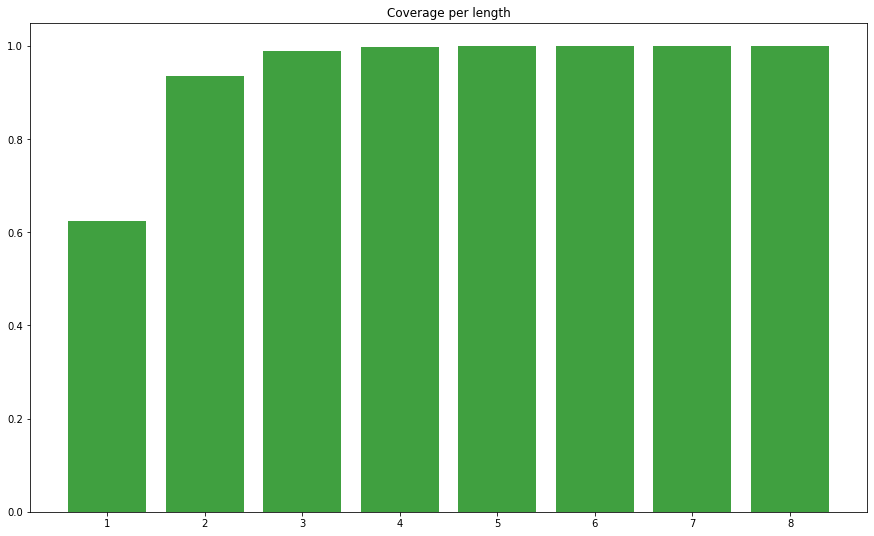

In [36]:
fig = plt.figure(figsize=(15, 9))
plt.title("Coverage per length")
plt.bar(coverage_per_length['length'], coverage_per_length['coverage'], facecolor='g', alpha=0.75)
plt.show()

In [37]:
select = 6

print(f'We select length {select}, which covers the following percentage:')

len(df[column <= select]) / total

We select length 6, which covers the following percentage:


0.9999364369072742

## Analysis of parameter comment
NOTE: the result of this must also be the length for the function comment in the return datapoints

In [38]:
df['arg_comment_length'] = df['arg_comment'].dropna().apply(lambda x: x.split()).apply(len)
total = len(df['arg_comment'].dropna())
column = df['arg_comment_length']
column.describe()

count    38919.000000
mean         6.382204
std         14.384335
min          1.000000
25%          3.000000
50%          4.000000
75%          7.000000
max       2491.000000
Name: arg_comment_length, dtype: float64

In [39]:
coverage_per_length = pd.DataFrame(
    [[i, len(df[column <= i]) / total] for i in np.unique(column.dropna())],
    columns=['length', 'coverage']
)
coverage_per_length

,length,coverage
0,1.0,0.017318
1,2.0,0.184332
2,3.0,0.378787
3,4.0,0.538349
4,5.0,0.643310
...,...,...
68,118.0,0.999897
69,128.0,0.999923
70,142.0,0.999949
71,359.0,0.999974


In [40]:
coverage_per_length[:20]

,length,coverage
0,1.0,0.017318
1,2.0,0.184332
2,3.0,0.378787
3,4.0,0.538349
4,5.0,0.643310
5,6.0,0.709062
6,7.0,0.770780
7,8.0,0.810144
8,9.0,0.838125
9,10.0,0.866312


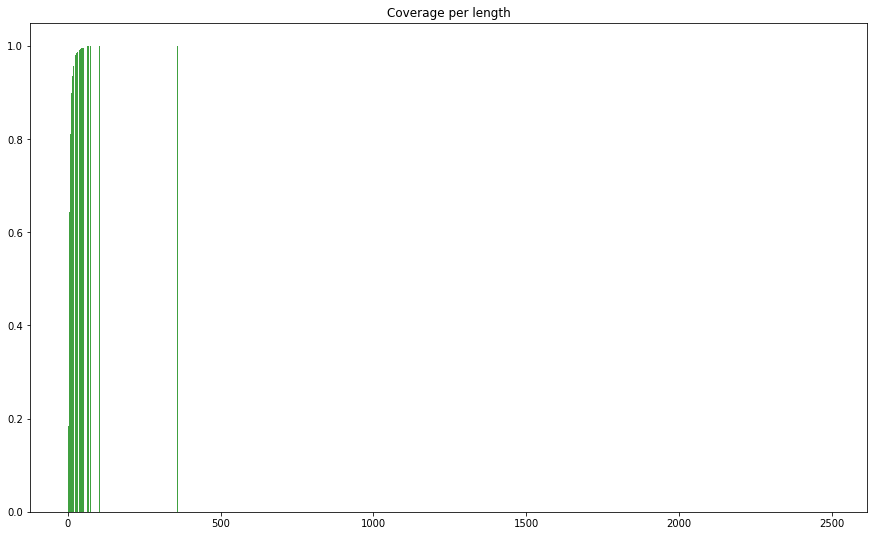

In [41]:
fig = plt.figure(figsize=(15, 9))
plt.title("Coverage per length")
plt.bar(coverage_per_length['length'], coverage_per_length['coverage'], facecolor='g', alpha=0.75)
plt.show()

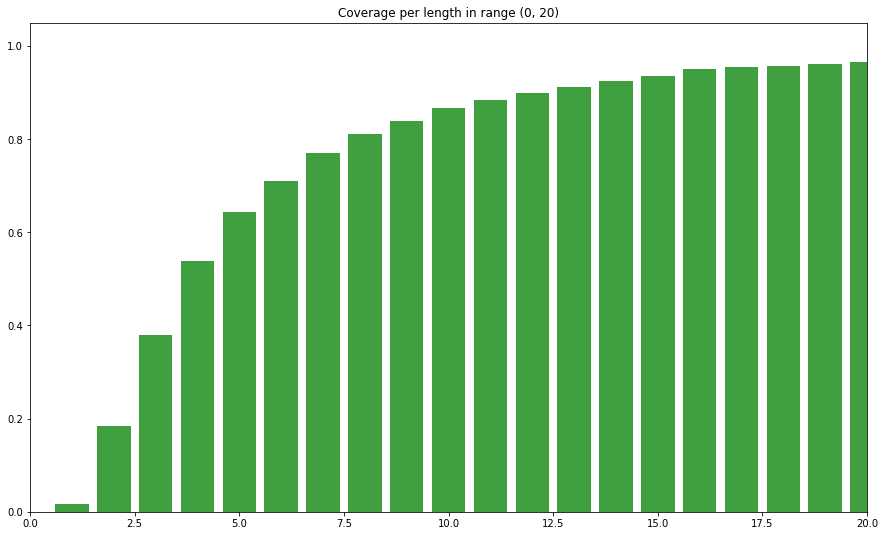

In [42]:
fig = plt.figure(figsize=(15, 9))
plt.title("Coverage per length in range (0, 20)")
plt.bar(coverage_per_length['length'], coverage_per_length['coverage'], facecolor='g', alpha=0.75)
plt.xlim([0,20])
plt.show()

In [43]:
select = 15

print(f'We select length {select}, which covers the following percentage:')

len(df[column <= select]) / total

We select length 15, which covers the following percentage:


0.9346077751226907